# Check units for GIUB dataset (not given in metadata)

In [11]:
import os,sys
import pandas as pd
import h5py as h5
import numpy as np 

In [3]:
giub = '/scratch/das/federico/COP2_HARVEST_MAR2023_giub_arctic_22MAR2023/giub/0-20000-0-94997_giub_harvested_4806.txt_converted_csv.csv.nc'
merg = '/scratch/das/federico//MERGED_FEB2023/0-20000-0-94997_CEUAS_merged_v1.nc'

In [20]:
def make_df(f):
    ot = h5.File(f,'r')['observations_table']
    dic = {}
    variables = ['date_time', 'z_coordinate', 'z_coordinate_type', 'observed_variable' , 'observation_value', 'latitude', 'longitude' ]
    for v in variables:
        dic[v] = ot[v][:]
    df = pd.DataFrame.from_dict(dic)
    
    df['date_time'] = pd.to_datetime( df['date_time'], unit='s',  origin=pd.Timestamp('1900-01-01') )
    return df



In [65]:
g_df = make_df(giub)
m_df = make_df(merg)


# GIUB 

In [26]:
DF = g_df
dtg = np.unique(DF.date_time)
print('Total DATETIME GIUB ' , len(dtg) )
print("min date" , min(dtg) )
print("MAX date" , max(dtg) )

DDF = DF.drop_duplicates(subset = ['latitude', 'longitude'])
print("LATITUDE LONGITUDE check " , DDF[['latitude','longitude']] )


Total DATETIME GIUB  10339
min date 1911-01-13T08:30:00.000000000
MAX date 1955-04-22T01:02:00.000000000
LATITUDE LONGITUDE check      latitude  longitude
0 -53.108334  73.722504


In [ ]:
# MERGED 

In [27]:
DF = m_df
dtm = np.unique(DF.date_time)
print('Total DATETIME MERGED ' , len(dtm) )
print("min date" , min(dtm) )
print("MAX date" , max(dtm) )

DDF = DF.drop_duplicates(subset = ['latitude', 'longitude'])
print("LATITUDE LONGITUDE check " , DDF[['latitude','longitude']] )


Total DATETIME MERGED  2327
min date 1948-02-09T11:00:00.000000000
MAX date 1954-10-30T04:00:00.000000000
LATITUDE LONGITUDE check         latitude  longitude
0    -53.099998  73.716698
4684 -53.099998  73.717003


In [37]:
import matplotlib.pyplot as plt 

In [147]:
#g_df_70000 = g_df.loc[g_df['z_coordinate'] == 700 ]
# TEMP 126 , WSPEED 106 , GPH 117 

# quick filtering 
def get_v(df, v=126, p=False, z=False):
    df= df.loc[ (df['observed_variable'] == v) & (df['observation_value'] > -300) ]

    if v not in [117]:
         df= df.loc[df['observation_value'] < 370]  
        
    if p:
        df= df.loc[ df['z_coordinate']==p ] 

    if z:
        df= df.loc[ df['z_coordinate_type']==z ]    
    return df 


g_df = make_df(giub)
m_df = make_df(merg)
# fixing pressure, in giub seems ot be [hPa] instead of [Pa] 
g_df['z_coordinate'] = g_df['z_coordinate']*100




#g_df_70000 = g_df.loc[g_df['z_coordinate'] == 70000 ]
#m_df_70000 = m_df.loc[m_df['z_coordinate'] == 70000 ]


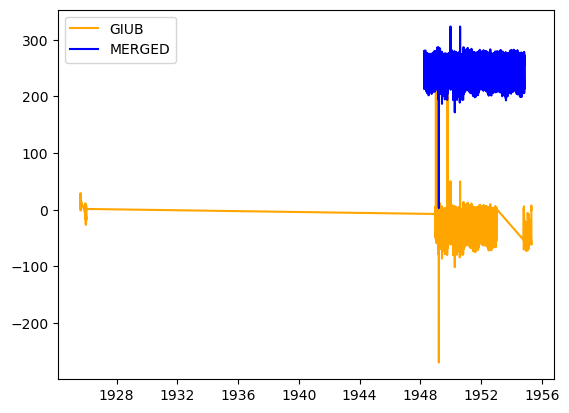

In [102]:
# Plot all temperature, no Plevel selection 
filt_merg = get_v(m_df, v=126, p=False )
filt_giub = get_v(g_df, v=126, p=False )

plt.plot( filt_giub.date_time , filt_giub.observation_value , label = 'GIUB'   , color = 'orange' )
plt.plot( filt_merg.date_time , filt_merg.observation_value , label = 'MERGED' , color = 'blue'   )
plt.legend()


/tmp/ipykernel_2306521/3589405384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_giub['observation_value'] = filt_giub['observation_value'][:] + 273.15


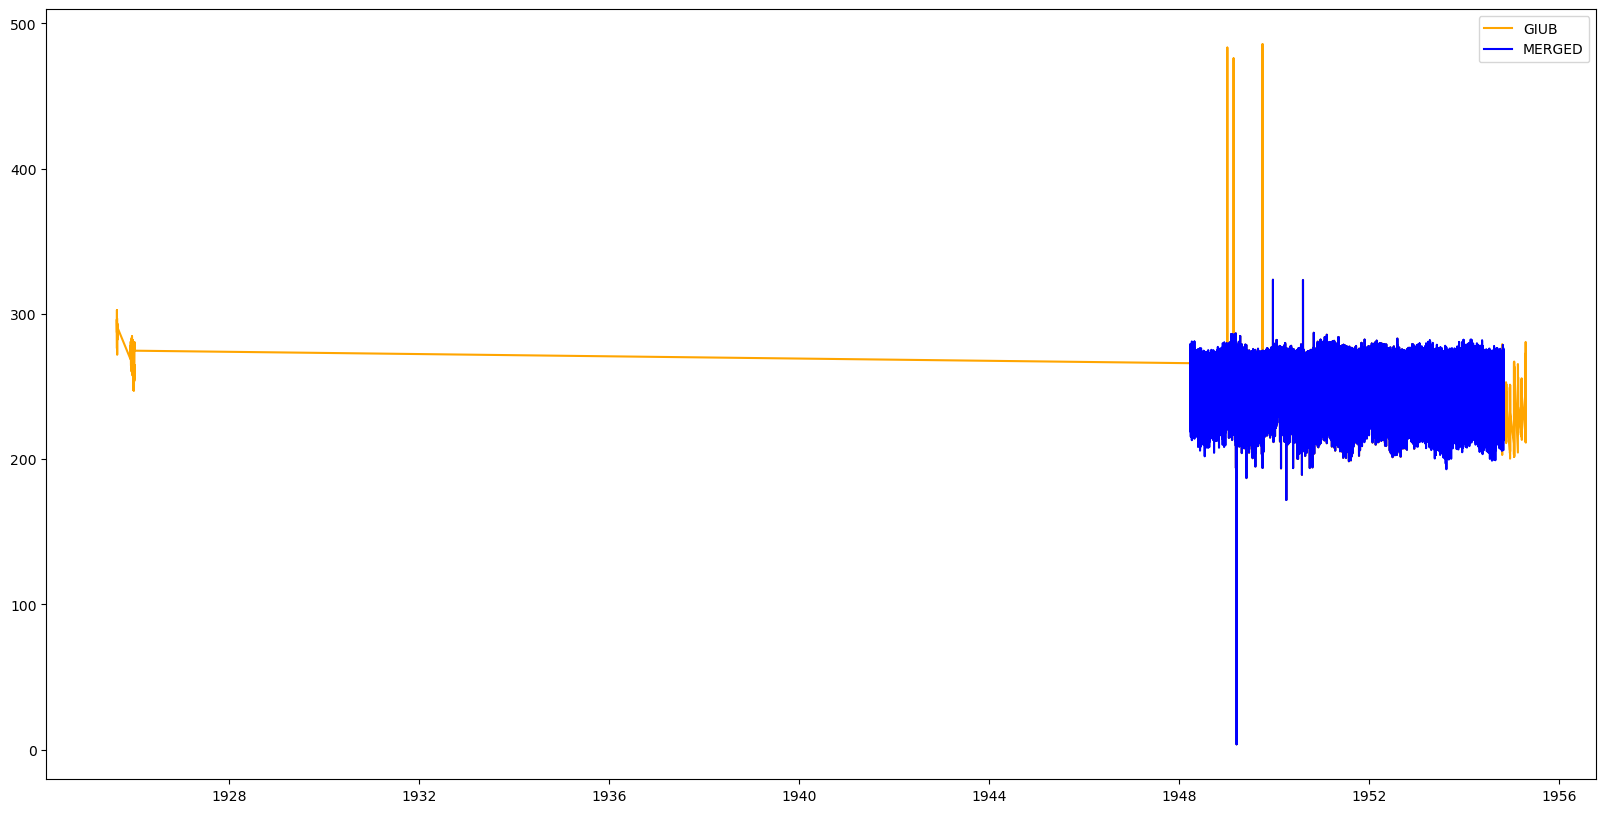

In [103]:
filt_giub['observation_value'] = filt_giub['observation_value'][:] + 273.15

plt.figure(figsize=(20,10))

plt.plot( filt_giub.date_time , filt_giub.observation_value , label = 'GIUB'   , color = 'orange' )
plt.plot( filt_merg.date_time , filt_merg.observation_value , label = 'MERGED' , color = 'blue'   )
plt.legend()
plt.show()
plt.close()

-725.8499755859375

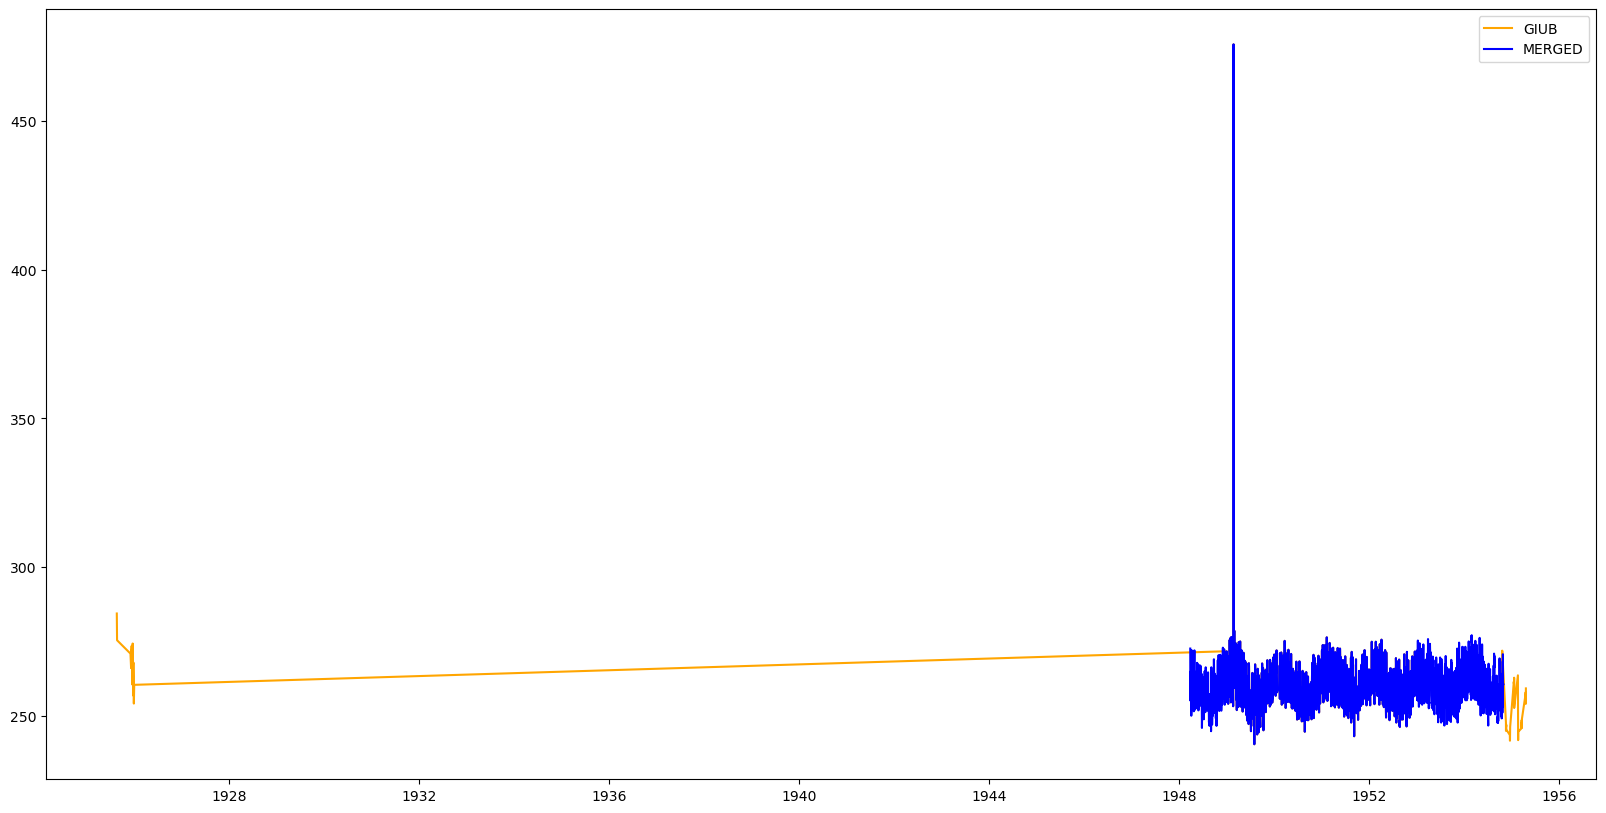

In [97]:
filt_merg = get_v(m_df, v=126, p = 70000)
filt_giub = get_v(g_df, v=126, p = 70000)

filt_giub['observation_value'] = filt_giub['observation_value'][:] + 273.15

plt.figure(figsize=(20,10))

plt.plot( filt_giub.date_time , filt_giub.observation_value , label = 'GIUB'   , color = 'orange' )
plt.plot( filt_merg.date_time , filt_merg.observation_value , label = 'MERGED' , color = 'blue'   )
plt.legend()


In [70]:
filt_giub['observation_value'] = filt_giub['observation_value'][:] + 273.15

/tmp/ipykernel_2306521/1448817861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_giub['observation_value'] = filt_giub['observation_value'][:] + 273.15


/tmp/ipykernel_2306521/4119818361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_giub['observation_value'] = filt_giub['observation_value'][:] + 273.15


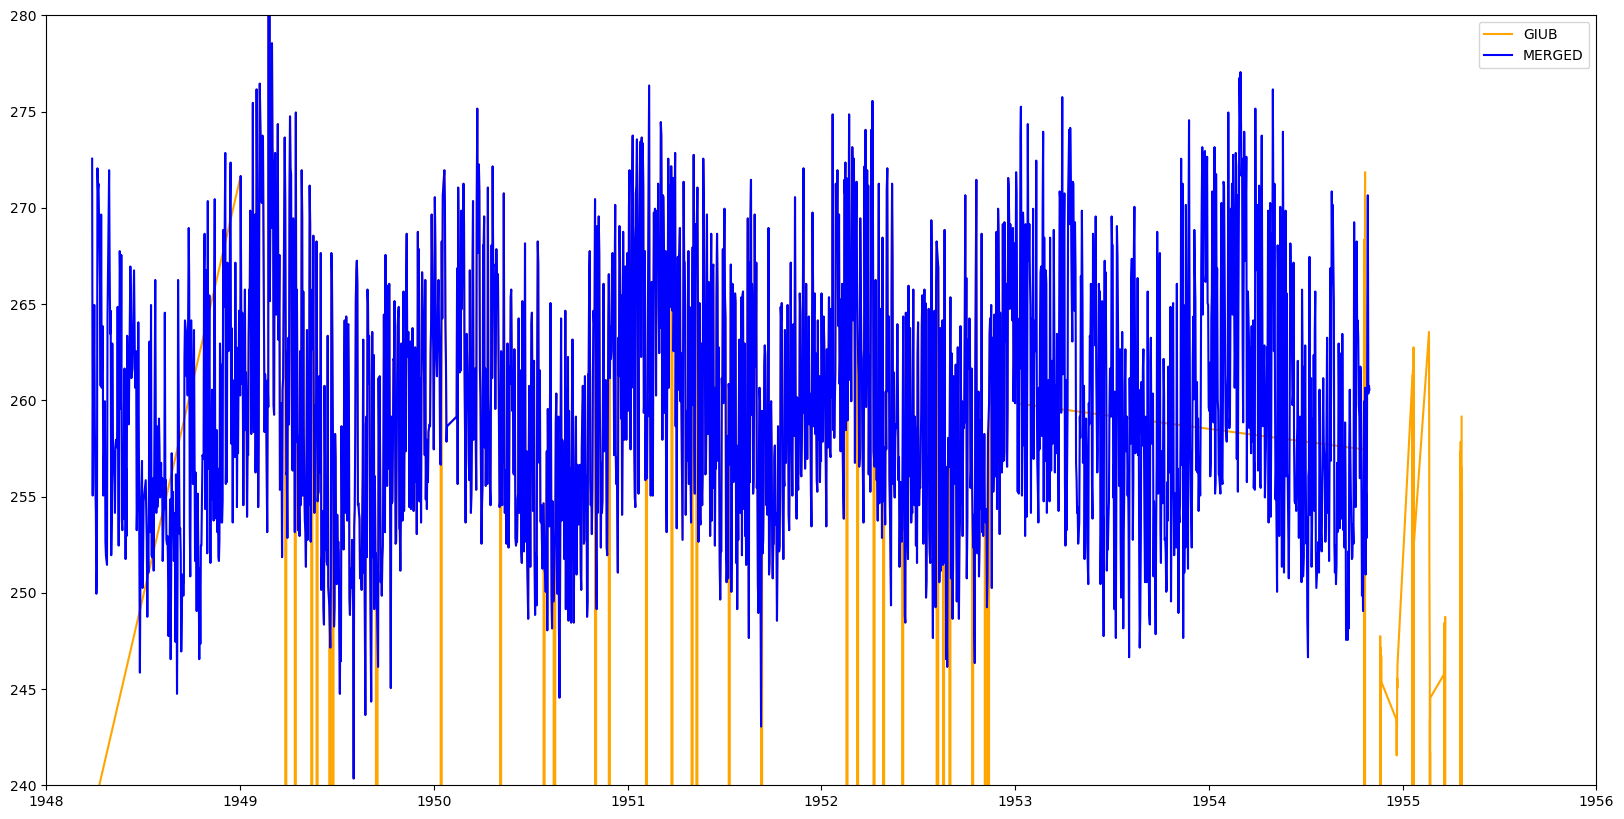

In [83]:
plt.figure(figsize=(20,10))

filt_giub['observation_value'] = filt_giub['observation_value'][:] + 273.15
plt.plot( filt_giub.date_time , filt_giub.observation_value , label = 'GIUB'   , color = 'orange' )
plt.plot( filt_merg.date_time , filt_merg.observation_value , label = 'MERGED' , color = 'blue'   )
plt.ylim([240,280])
plt.xlim([pd.Timestamp('1948-01-01'), pd.Timestamp('1956-01-01') ])


print('MERGED ::: ' , len(filt_merg))
print('GIUB ::: ' , len(filt_giub))

plt.legend()

In [ ]:
## New file after the fixes 

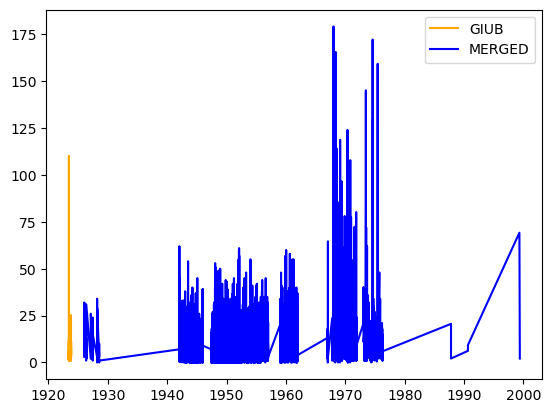

In [157]:
giub = '/users/staff/federico/GitHub/CEUAS_master_JULY2922/CEUAS/CEUAS/public/harvest/code_cop2/COP2/giub/0-20000-0-08238_giub_harvested_4928.txt_converted_csv.csv.nc'
merg = '/scratch/das/federico/MERGED_FEB2023/0-20000-0-08238_CEUAS_merged_v1.nc'
g_df = make_df(giub)
m_df = make_df(merg)

# Plot all temperature, no Plevel selection 
filt_merg = get_v(m_df, v=107, p=False )
filt_giub = get_v(g_df, v=107, p=False )

plt.plot( filt_giub.date_time , filt_giub.observation_value , label = 'GIUB'   , color = 'orange' )
plt.plot( filt_merg.date_time , filt_merg.observation_value , label = 'MERGED' , color = 'blue'   )
plt.legend()



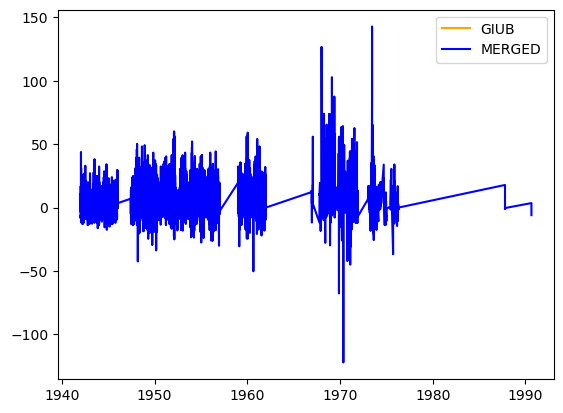

In [155]:
# Plot all temperature, no Plevel selection 
filt_merg = get_v(m_df, v=139, p=False )
filt_giub = get_v(g_df, v=139, p=False )

plt.plot( filt_giub.date_time , filt_giub.observation_value , label = 'GIUB'   , color = 'orange' )
plt.plot( filt_merg.date_time , filt_merg.observation_value , label = 'MERGED' , color = 'blue'   )
plt.legend()

In [148]:
g_df = make_df(giub)


filt_giub_gph = get_v(g_df, v=117, p=False )



In [156]:
g_df

,date_time,z_coordinate,z_coordinate_type,observed_variable,observation_value,latitude,longitude
0,1923-06-12 07:15:00,1150.0,2,117,11277.647461,40.820278,0.493333
1,1923-06-12 07:15:00,1150.0,2,126,NaN,40.820278,0.493333
2,1923-06-12 07:15:00,1150.0,2,107,5.900000,40.820278,0.493333
3,1923-06-12 07:15:00,1150.0,2,106,299.000000,40.820278,0.493333
4,1923-06-12 07:15:00,1150.0,2,139,NaN,40.820278,0.493333
...,...,...,...,...,...,...,...
443,1923-10-20 07:00:00,6550.0,2,107,22.500000,40.820278,0.493333
444,1923-10-20 07:00:00,6550.0,2,106,240.000000,40.820278,0.493333
445,1923-10-20 07:00:00,6550.0,2,139,NaN,40.820278,0.493333
446,1923-10-20 07:00:00,6550.0,2,140,NaN,40.820278,0.493333


In [150]:
max(filt_giub_gph.observation_value)

64233.55859375

In [151]:
min(filt_giub_gph.observation_value)

490.3324890136719